# Import data from Drive and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input,Dense,Dropout,concatenate
from keras.metrics import BinaryAccuracy, MeanSquaredError
from keras.losses import BinaryCrossentropy, MeanSquaredError

from datetime import datetime

# !pip install tensorflow tensorflow_decision_forests
# import tensorflow_decision_forests as tfdf

!pip install keras-tuner -q
import keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [2]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices())
# tpu_strategy = tf.distribute.TPUStrategy(resolver)
# tpu_strategy.num_replicas_in_sync

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/'

# Reading and cleaning data

In [35]:
df_tot = pd.read_csv(path+'dielectron.csv')
df_tot.rename(columns={"px1 ": "px1"}, inplace=True)
colname = df_tot.columns.values.tolist()
colname

['Run',
 'Event',
 'E1',
 'px1',
 'py1',
 'pz1',
 'pt1',
 'eta1',
 'phi1',
 'Q1',
 'E2',
 'px2',
 'py2',
 'pz2',
 'pt2',
 'eta2',
 'phi2',
 'Q2',
 'M']

In [36]:
df_tot['Event'].value_counts()

439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
            ..
533929729    1
533477001    1
533722800    1
533379552    1
524172389    1
Name: Event, Length: 99976, dtype: int64

In [37]:
dup_ev = df_tot["Event"].value_counts()[df_tot["Event"].value_counts() > 1].index.tolist()
df_tot[df_tot['Event'].isin(dup_ev)].sort_values(by='Event')

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


In [38]:
df_tot.loc[79612, "Event"] = 418006835
dup_ev.remove(418006834)
df_tot = df_tot.drop_duplicates(subset="Event")
df_tot.duplicated().sum()

0

In [39]:
df_tot = df_tot.dropna(subset=["M"])
print("Number of missing values after dropping rows: ", df_tot.isnull().sum().sum())
df_tot

Number of missing values after dropping rows:  0


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


In [40]:
df_m = df_tot['M']
df_tot = df_tot.drop(columns=['M'])
df_train,df_test,m_train,m_test = train_test_split(df_tot,df_m,train_size=0.6,random_state=42)
df_train = pd.DataFrame(df_train,columns=colname[:-1])
df_test = pd.DataFrame(df_test,columns=colname[:-1])
df_train.describe()
print()
df_test

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
89965,146944,391490453,18.45890,-5.91785,1.005990,-17.45560,6.00275,-1.788930,2.973210,-1,17.8412,16.06630,-5.95034,4.97782,17.13280,0.286604,-0.354699,-1
63986,147754,203699768,21.66480,-3.93214,-1.253840,-21.26800,4.12721,-2.342030,-2.832920,-1,225.3180,-30.78760,-32.47510,-220.83000,44.74940,-2.299570,-2.329530,-1
97286,146511,150208187,24.25680,10.64240,12.093700,18.13490,16.10960,0.967538,0.849146,1,21.9095,-2.72188,-5.61025,21.00340,6.23566,1.928890,-2.022500,-1
19935,149181,1707672587,3.70766,2.79384,0.898435,-2.26584,2.93475,-0.710712,0.311133,-1,101.5830,-13.39960,9.62691,100.23400,16.49930,2.504050,2.518590,1
82793,147926,256283605,11.67360,-3.18392,-5.098650,-10.00690,6.01112,-1.282800,-2.129010,-1,29.3465,-1.52794,-12.98330,-26.27390,13.07290,-1.448010,-1.687940,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,146644,1478430836,66.33360,7.70116,-12.125000,64.75970,14.36400,2.211190,-1.004930,-1,12.9337,3.10991,8.40543,9.32514,8.96230,0.909713,1.216430,1
63384,147754,37485269,5.75824,3.36300,1.300200,4.48967,3.60559,1.044590,0.368920,1,23.8243,14.15630,16.88040,9.06916,22.03060,0.400841,0.872947,1
50854,149011,589100668,4.56491,2.39751,-1.930750,3.37083,3.07829,0.947002,-0.677974,-1,26.1262,9.80817,-20.93790,12.16470,23.12130,0.504457,-1.132710,1
20921,149181,708811995,58.99320,-4.36371,10.435200,57.89870,11.31090,2.335480,1.966870,-1,15.3795,-3.24601,2.85177,-14.76000,4.32078,-1.942400,2.420760,-1


In [41]:
df_run = df_train['Run']
df_event = df_train['Event']
df_train = df_train.drop(columns=['Run','Event'])

scaling = True

if scaling:
  scaler = MinMaxScaler()
  df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train),columns=colname[2:18])
else:
  df_train_scaled = df_train
df_train.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000
mean,36.345994,0.137456,0.173169,-1.374874,14.425014,-0.061297,0.018857,-0.000584,43.920888,-0.037114,0.148843,-1.663709,13.775324,-0.074896,0.023328,-0.005723
std,40.753536,13.368756,13.490864,51.178488,12.356837,1.461533,1.798385,1.000008,46.769464,13.107757,13.161832,61.389092,12.462259,1.738619,1.817901,0.999992
min,0.518048,-159.889000,-118.173000,-463.484000,0.250803,-4.165380,-3.141400,-1.000000,0.489425,-233.730000,-145.651000,-655.396000,0.347119,-3.221530,-3.141580,-1.000000
25%,8.477430,-5.229800,-5.301865,-15.780800,3.787525,-1.280785,-1.526195,-1.000000,11.051450,-4.815950,-4.554020,-22.045550,3.724395,-1.894205,-1.556780,-1.000000
50%,21.775900,0.163365,0.097365,-0.272451,12.983900,-0.054733,0.034038,-1.000000,25.209100,-0.050575,0.083231,-0.697403,11.630000,-0.141269,0.026553,-1.000000
75%,50.074350,5.756325,5.614685,13.265750,20.043750,1.145475,1.554500,1.000000,66.663750,4.773460,5.072785,18.876150,19.580900,1.767670,1.604090,1.000000
max,521.519000,115.827000,128.120000,513.709000,167.772000,2.622970,3.141420,1.000000,745.497000,161.983000,148.043000,728.845000,239.373000,3.060550,3.141260,1.000000


In [42]:
df_train_scaled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59935 entries, 0 to 59934
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      59935 non-null  float64
 1   px1     59935 non-null  float64
 2   py1     59935 non-null  float64
 3   pz1     59935 non-null  float64
 4   pt1     59935 non-null  float64
 5   eta1    59935 non-null  float64
 6   phi1    59935 non-null  float64
 7   Q1      59935 non-null  float64
 8   E2      59935 non-null  float64
 9   px2     59935 non-null  float64
 10  py2     59935 non-null  float64
 11  pz2     59935 non-null  float64
 12  pt2     59935 non-null  float64
 13  eta2    59935 non-null  float64
 14  phi2    59935 non-null  float64
 15  Q2      59935 non-null  float64
dtypes: float64(16)
memory usage: 7.3 MB



79271    18.70900
65387     8.72596
59812    16.61060
33932    26.80400
80739    25.19920
           ...   
6269     13.30000
54925    27.31490
76893    11.36720
860       7.85807
15808     3.65144
Name: M, Length: 59935, dtype: float64

In [43]:
df_test_run = df_test.pop('Run')
df_test_event = df_test.pop('Event')
#df_test_mass = df_test.pop('M')

if scaling:
  df_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=colname[2:-1])
else:
  df_test_scaled = df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39957 entries, 0 to 39956
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      39957 non-null  float64
 1   px1     39957 non-null  float64
 2   py1     39957 non-null  float64
 3   pz1     39957 non-null  float64
 4   pt1     39957 non-null  float64
 5   eta1    39957 non-null  float64
 6   phi1    39957 non-null  float64
 7   Q1      39957 non-null  float64
 8   E2      39957 non-null  float64
 9   px2     39957 non-null  float64
 10  py2     39957 non-null  float64
 11  pz2     39957 non-null  float64
 12  pt2     39957 non-null  float64
 13  eta2    39957 non-null  float64
 14  phi2    39957 non-null  float64
 15  Q2      39957 non-null  float64
dtypes: float64(16)
memory usage: 4.9 MB



89965    32.16470
63986     6.79365
97286    22.24300
19935    35.56790
82793     4.14619
           ...   
10156    25.76870
63384     7.33666
50854     5.35108
20921    58.61650
24651    83.87090
Name: M, Length: 39957, dtype: float64

In [46]:
df_test_scaled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39957 entries, 0 to 39956
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      39957 non-null  float64
 1   px1     39957 non-null  float64
 2   py1     39957 non-null  float64
 3   pz1     39957 non-null  float64
 4   pt1     39957 non-null  float64
 5   eta1    39957 non-null  float64
 6   phi1    39957 non-null  float64
 7   Q1      39957 non-null  float64
 8   E2      39957 non-null  float64
 9   px2     39957 non-null  float64
 10  py2     39957 non-null  float64
 11  pz2     39957 non-null  float64
 12  pt2     39957 non-null  float64
 13  eta2    39957 non-null  float64
 14  phi2    39957 non-null  float64
 15  Q2      39957 non-null  float64
dtypes: float64(16)
memory usage: 4.9 MB



89965    32.16470
63986     6.79365
97286    22.24300
19935    35.56790
82793     4.14619
           ...   
10156    25.76870
63384     7.33666
50854     5.35108
20921    58.61650
24651    83.87090
Name: M, Length: 39957, dtype: float64

In [58]:
# mass_scaler = MinMaxScaler()
# m_train_scaled = mass_scaler.fit_transform(m_train)
# m_test_scaled = mass_scaler.transform(m_test)

# Double Input Model

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputLayer1 (InputLayer)    [(None, 8)]                  0         []                            
                                                                                                  
 InputLayer2 (InputLayer)    [(None, 8)]                  0         []                            
                                                                                                  
 DenseLayer1 (Dense)         (None, 16)                   144       ['InputLayer1[0][0]']         
                                                                                                  
 DenseLayer2 (Dense)         (None, 16)                   144       ['InputLayer2[0][0]']         
                                                                                            

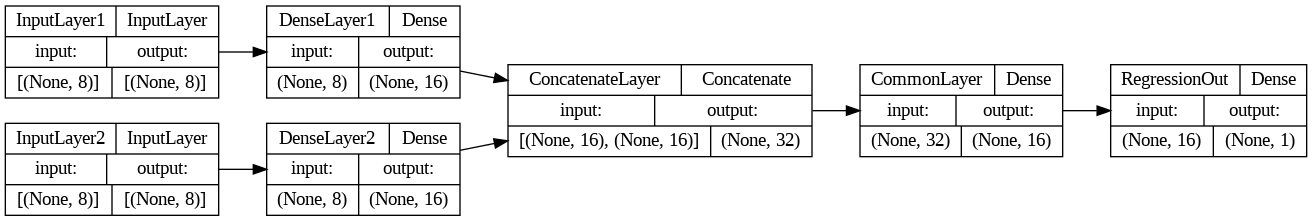

In [72]:
#with tpu_strategy.scope():
input_layer1 = Input(shape=(8,),name='InputLayer1')
layer1 = Dense(16,activation="leaky_relu",name='DenseLayer1')(input_layer1)
#layer = Dropout(0.2,name='DropoutLayer')(layer)
#layer = Dense(20,activation='leaky_relu',name='CommonLayer2')(layer)
input_layer2 = Input(shape=(8,),name='InputLayer2')
layer2 = Dense(16,activation='leaky_relu',name='DenseLayer2')(input_layer2)

concat_layer = concatenate([layer1,layer2],name="ConcatenateLayer")
layer = Dense(16,activation='relu',name="CommonLayer")(concat_layer)
#binary_out = Dense(1, activation='sigmoid', name='BinaryOut')(layer)
regression_out = Dense(1, activation='relu', name='RegressionOut')(layer)

model_double = Model(inputs=[input_layer1,input_layer2], outputs=regression_out)

model_double.compile(optimizer=keras.optimizers.Adam(),
              loss='mse',
              metrics='mae')

ES_train = EarlyStopping(monitor='loss',
                         min_delta=0.01,
                         patience=5,
                         restore_best_weights=True)
ES_val = EarlyStopping(monitor='val_loss',
                       min_delta=0.01,
                       patience=10,
                       restore_best_weights=True)

model_double.summary()
keras.utils.plot_model(model_double,rankdir='LR',show_shapes=True)

In [73]:
start_time = datetime.now()
df_1 = df_train_scaled.iloc[:,:8]
df_2 = df_train_scaled.iloc[:,8:16]
history = model_double.fit([df_1,df_2],m_train,
                    batch_size=32,
                    verbose=1,
                    epochs=1000,
                    callbacks=[ES_train,ES_val],
                    validation_split=0.2)

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

Epoch 1/1000
1499/1499 [==============================] - 5s 3ms/step - loss: 464.4684 - mae: 15.4251 - val_loss: 254.1354 - val_mae: 11.5261
Epoch 2/1000
1499/1499 [==============================] - 6s 4ms/step - loss: 153.9763 - mae: 8.9821 - val_loss: 122.5242 - val_mae: 8.0513
Epoch 3/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 103.2322 - mae: 7.5606 - val_loss: 96.1807 - val_mae: 7.1377
Epoch 4/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 77.6853 - mae: 6.5686 - val_loss: 71.1861 - val_mae: 6.0683
Epoch 5/1000
1499/1499 [==============================] - 5s 4ms/step - loss: 58.5267 - mae: 5.7068 - val_loss: 58.0744 - val_mae: 5.5552
Epoch 6/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 50.6395 - mae: 5.3155 - val_loss: 52.4222 - val_mae: 5.3636
Epoch 7/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 46.4565 - mae: 5.0753 - val_loss: 47.4912 - val_mae: 5.0462
Epoch 8/1000
1499/1499 [===

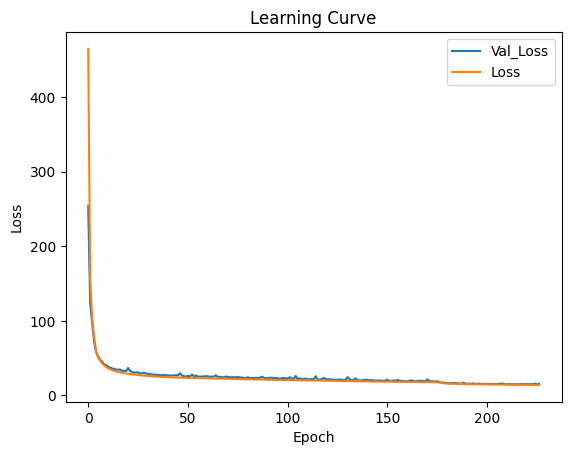

In [74]:
val_loss_values = history.history['val_loss']
loss_values = history.history['loss']

valloss_plot = plt.plot(val_loss_values, label='Val_Loss')
lossplot = plt.plot(loss_values, label="Loss")
xaxis = plt.xlabel('Epoch')
yaxis = plt.ylabel('Loss')
title = plt.title('Learning Curve')
plt.legend()
plt.show()

In [75]:
df_test_1 = df_test_scaled.iloc[:,:8]
df_test_2 = df_test_scaled.iloc[:,8:16]
test_results = model.evaluate([df_test_1,df_test_2], m_test)
test_results

1249/1249 [==============================] - 3s 2ms/step - loss: 32.0185 - mse: 32.0185 - mae: 3.8450


[32.01846694946289, 32.01846694946289, 3.844973087310791]

# Single Input Model

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 HL1 (Dense)                 (None, 32)                544       
                                                                 
 HL2 (Dense)                 (None, 16)                528       
                                                                 
 RegOut (Dense)              (None, 1)                 17        
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


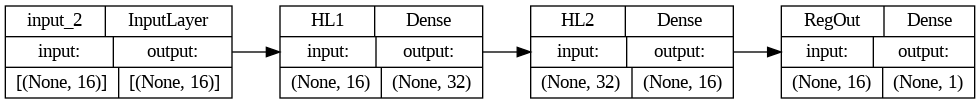

In [69]:
input_layer = Input(shape=(16,))
layer = Dense(32,activation='relu',name='HL1')(input_layer)
layer = Dense(16,activation='relu',name='HL2')(layer)
out_layer = Dense(1,activation='relu',name='RegOut')(layer)

model_single = Model(inputs=input_layer, outputs=out_layer)
model_single.compile(optimizer="adam",loss='mse',metrics='mae')

model_single.summary()
keras.utils.plot_model(model_single,rankdir='LR',show_shapes=True)

In [70]:
start_time = datetime.now()
history_single = model_single.fit(df_test_scaled,m_train,
                    batch_size=32,
                    verbose=1,
                    epochs=1000,
                    callbacks=[ES_train,ES_val],
                    validation_split=0.2)

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

Epoch 1/1000
999/999 [==============================] - 4s 3ms/step - loss: 760.6308 - mae: 20.5040 - val_loss: 647.9893 - val_mae: 19.9799
Epoch 2/1000
999/999 [==============================] - 2s 2ms/step - loss: 645.9983 - mae: 19.6062 - val_loss: 645.1400 - val_mae: 19.8337
Epoch 3/1000
999/999 [==============================] - 2s 2ms/step - loss: 643.9426 - mae: 19.6004 - val_loss: 644.8809 - val_mae: 19.3842
Epoch 4/1000
999/999 [==============================] - 4s 4ms/step - loss: 642.8665 - mae: 19.5903 - val_loss: 644.4747 - val_mae: 19.4508
Epoch 5/1000
999/999 [==============================] - 5s 5ms/step - loss: 642.0642 - mae: 19.5792 - val_loss: 645.2176 - val_mae: 19.3010
Epoch 6/1000
999/999 [==============================] - 4s 4ms/step - loss: 641.5975 - mae: 19.5650 - val_loss: 643.6516 - val_mae: 19.7355
Epoch 7/1000
999/999 [==============================] - 6s 6ms/step - loss: 640.6177 - mae: 19.5718 - val_loss: 643.7504 - val_mae: 19.4424
Epoch 8/1000
999/999

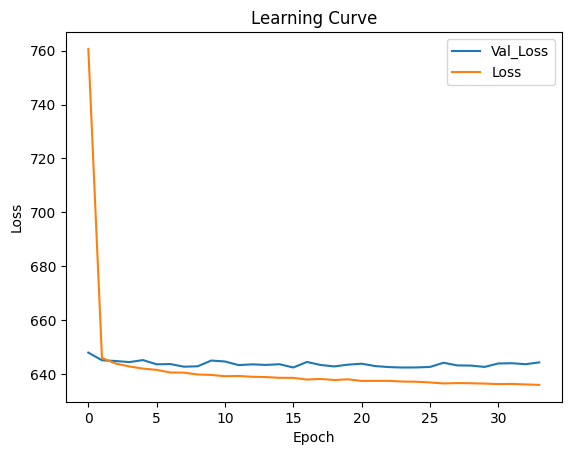

In [71]:
val_loss_values = history_single.history['val_loss']
loss_values = history_single.history['loss']

valloss_plot = plt.plot(val_loss_values, label='Val_Loss')
lossplot = plt.plot(loss_values, label="Loss")
xaxis = plt.xlabel('Epoch')
yaxis = plt.ylabel('Loss')
title = plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
test_results = model_single.evaluate(df_test_scaled, m_test)
test_results

# Hyperparameter tuning (Single)

In [84]:
def build_single_model(hp):
  input = Input(shape=(16,),name='Input')
  layer = Dense(hp.Int('node0',min_value=10,max_value=70,step=10),activation='leaky_relu',name='HL0')(input)
  for i in range(hp.Int('nlayers',min_value=1,max_value=3,step=1)):
    layer = Dense(hp.Int(f'node{i+1}',min_value=10*(i+1),max_value=10*(i+4),step=10),activation='relu',name=f'HL{i+1}')(layer)
  output = Dense(1,activation='relu',name='Output')(layer)

  model_single = Model(inputs=input,outputs=output)
  model_single.compile(optimizer='adam',
              loss='mse',
              metrics='mae')
  return model_single

build_single_model(keras_tuner.HyperParameters())

In [85]:
tuner_single = keras_tuner.BayesianOptimization(
    hypermodel= build_single_model,
    objective='val_loss',
    max_trials=20,
#    executions_per_trial=2,
    overwrite=True,
    directory='/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/',
    project_name='SingleBayesianHyperOpt'
)

In [86]:
tuner_single.search_space_summary()

Search space summary
Default search space size: 3
node0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 70, 'step': 10, 'sampling': 'linear'}
nlayers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
node1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 40, 'step': 10, 'sampling': 'linear'}


In [87]:
ES_train = EarlyStopping(monitor = 'loss',
                      min_delta=0.01,
                      patience=5,
                      mode='auto',
                      restore_best_weights=True)
ES_val = EarlyStopping(monitor = 'val_loss',
                        min_delta=0.01,
                        patience=5,
                        mode = 'auto',
                        restore_best_weights=True)

In [ ]:
tuner_single.search(df_train_scaled,m_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[ES_train,ES_val],
             batch_size=32)

Trial 1 Complete [00h 02m 47s]
val_loss: 3.901236057281494

Best val_loss So Far: 3.901236057281494
Total elapsed time: 00h 02m 47s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
30                |20                |node0
3                 |3                 |nlayers
20                |20                |node1
20                |20                |node2
60                |30                |node3

Epoch 1/100
1499/1499 [==============================] - 7s 4ms/step - loss: 155.6354 - mae: 7.5789 - val_loss: 30.1321 - val_mae: 4.0265
Epoch 2/100
1499/1499 [==============================] - 4s 3ms/step - loss: 22.6885 - mae: 3.5054 - val_loss: 19.7787 - val_mae: 3.2091
Epoch 3/100
1499/1499 [==============================] - 4s 3ms/step - loss: 15.4241 - mae: 2.8774 - val_loss: 13.9676 - val_mae: 2.6785
Epoch 4/100
1499/1499 [==============================] - 5s 4ms/step - loss: 11.4957 - mae: 2.4796 - val_loss: 10.8205 - val_mae: 2.3568
Epoch 5/100
1499

In [ ]:
tuner_single.results_summary()

# Hyperparameter tuning (Double)

In [ ]:
def build_double_model(hp):
  input1 = Input(shape=(8,),name='Input1')
  layer1 = Dense(hp.Int('node0',min_value=10,max_value=40,step=10),activation='leaky_relu',name='HL01')(input1)
  input2 = Input(shape=(8,),name='Input2')
  layer2 = Dense(hp.Int('node0',min_value=10,max_value=40,step=10),activation='leaky_relu',name='HL02')(input2)
  layer = concatenate([layer1,layer2],name='Concatenate')
  for i in range(hp.Int('nlayers',min_value=1,max_value=3,step=1)):
    layer = Dense(hp.Int(f'node{i+1}',min_value=10*(i+1),max_value=10*(i+4),step=10),activation='relu',name=f'HL{i+1}')(layer)
  output = Dense(1,activation='relu',name='Output')(layer)

  model_double = Model(inputs=input,outputs=output)
  model_double.compile(optimizer='adam',
              loss='mse',
              metrics='mae')
  return model_double

build_double_model(keras_tuner.HyperParameters())

In [ ]:
tuner_double = keras_tuner.BayesianOptimization(
    hypermodel= build_double_model,
    objective='val_loss',
    max_trials=20,
#    executions_per_trial=2,
    overwrite=True,
    directory='/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/',
    project_name='DoubleBayesianHyperOpt'
)

In [ ]:
tuner_double.search_space_summary()

In [ ]:
tuner_double.search([df_1,df_2],m_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[ES_train,ES_val],
             batch_size=32)

In [ ]:
tuner_double.results_summary()